# Importing Required libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_transaction = pd.read_csv('train_transaction.csv')

In [3]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Understanding the data

In [4]:
train_transaction.shape

(590540, 394)

In [5]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [6]:
train_transaction.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [7]:
train_identity = pd.read_csv('train_identity.csv')

In [8]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [9]:
train_identity.shape

(144233, 41)

In [10]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [11]:
df = train_transaction.merge(train_identity, how = 'left', on = 'TransactionID')
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [12]:
df.shape

(590540, 434)

In [13]:
df.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

# Preparing the data

In [14]:
df_num = df.select_dtypes(exclude = 'object')
df_num.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,32.0


In [15]:
df_num.shape

(590540, 403)

In [16]:
df_num.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
card1                  0
                   ...  
id_22             585371
id_24             585793
id_25             585408
id_26             585377
id_32             512954
Length: 403, dtype: int64

In [17]:
percent_missing_values = df_num.isnull().sum() * 100 / len(df_num)
missing_values = pd.DataFrame({'column_name':df_num.columns,
                               'percent_missing':percent_missing_values})
missing_values = missing_values.sort_values('percent_missing', ascending=False)
missing_values.head()


,column_name,percent_missing
id_24,id_24,99.196159
id_25,id_25,99.130965
id_07,id_07,99.127070
id_08,id_08,99.127070
id_21,id_21,99.126393


In [18]:
missing_values = missing_values[missing_values.percent_missing > 40]
df_num = df_num.drop(missing_values.column_name, axis=1)

In [19]:
df_num.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_num.shape

(590540, 197)

In [21]:
df_num.fillna(df_num.median(),inplace = True)

In [22]:
df_num.isnull().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
card1             0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 197, dtype: int64

In [23]:
df_obj = df.select_dtypes(include = 'object')
df_obj.head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [24]:
df_obj.isnull().sum()

ProductCD             0
card4              1577
card6              1571
P_emaildomain     94456
R_emaildomain    453249
M1               271100
M2               271100
M3               271100
M4               281444
M5               350482
M6               169360
M7               346265
M8               346252
M9               346252
id_12            446307
id_15            449555
id_16            461200
id_23            585371
id_27            585371
id_28            449562
id_29            449562
id_30            512975
id_31            450258
id_33            517251
id_34            512735
id_35            449555
id_36            449555
id_37            449555
id_38            449555
DeviceType       449730
DeviceInfo       471874
dtype: int64

In [25]:
percent_missing_values = df_obj.isnull().sum() * 100 / len(df_num)
missing_values = pd.DataFrame({'column_name':df_obj.columns,
                               'percent_missing':percent_missing_values})
missing_values = missing_values.sort_values('percent_missing', ascending=False)
missing_values.head()

,column_name,percent_missing
id_27,id_27,99.124699
id_23,id_23,99.124699
id_33,id_33,87.589494
id_30,id_30,86.865411
id_34,id_34,86.824771


In [26]:
missing_values = missing_values[missing_values.percent_missing > 50]
df_obj = df_obj.drop(missing_values.column_name, axis=1)
df_obj.head()

,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M6
0,W,discover,credit,NaN,T,T,T,M2,T
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,M0,T
2,W,visa,debit,outlook.com,T,T,T,M0,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,M0,F
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN


In [27]:
df_obj.shape

(590540, 9)

In [28]:
for col in df_obj.columns:
    mode = df_obj[col].mode()[0]
    df_obj[col].fillna(mode, inplace=True)

In [29]:
df_obj.isnull().sum()

ProductCD        0
card4            0
card6            0
P_emaildomain    0
M1               0
M2               0
M3               0
M4               0
M6               0
dtype: int64

In [30]:
df_obj.head()

,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M6
0,W,discover,credit,gmail.com,T,T,T,M2,T
1,W,mastercard,credit,gmail.com,T,T,T,M0,T
2,W,visa,debit,outlook.com,T,T,T,M0,F
3,W,mastercard,debit,yahoo.com,T,T,T,M0,F
4,H,mastercard,credit,gmail.com,T,T,T,M0,F


In [31]:
df_obj.ProductCD.value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

# Visualizations

In [32]:
df = pd.concat([df_num, df_obj], axis=1)

In [33]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V321,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M6
0,2987000,0,86400,68.5,13926,361.0,150.0,142.0,315.0,87.0,...,0.0,W,discover,credit,gmail.com,T,T,T,M2,T
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,0.0,W,mastercard,credit,gmail.com,T,T,T,M0,T
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,0.0,W,visa,debit,outlook.com,T,T,T,M0,F
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,0.0,W,mastercard,debit,yahoo.com,T,T,T,M0,F
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,0.0,H,mastercard,credit,gmail.com,T,T,T,M0,F


In [34]:
Q1 = df['TransactionAmt'].quantile(0.25)
Q3 = df['TransactionAmt'].quantile(0.75)
IQR = Q3 - Q1

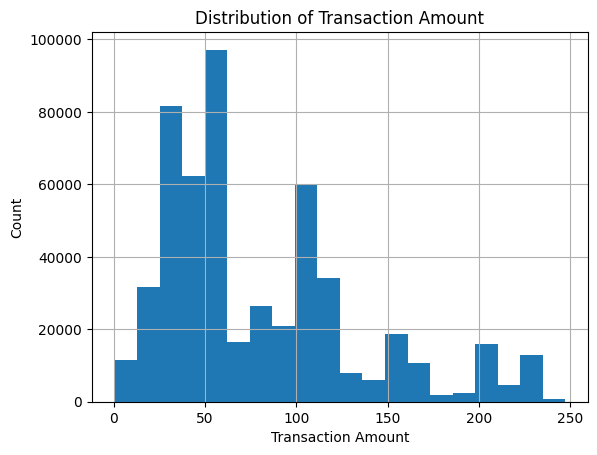

In [35]:
df_filtered = df[(df['TransactionAmt'] >= Q1 - 1.5*IQR) & (df['TransactionAmt'] <= Q3 + 1.5*IQR)]

df_filtered.hist(column='TransactionAmt', bins=20)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amount')
plt.show()

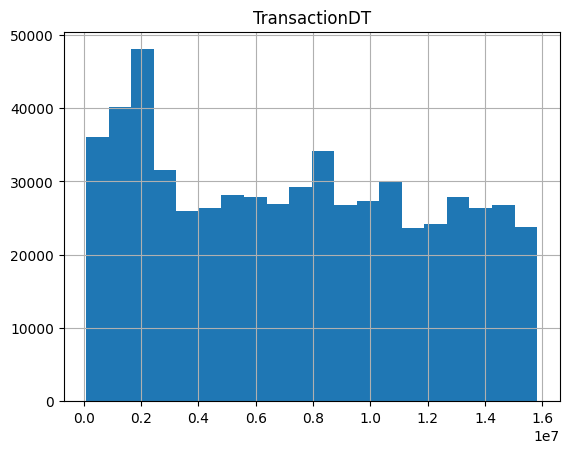

In [36]:
df.hist(column=['TransactionDT'], bins=20)
plt.show()

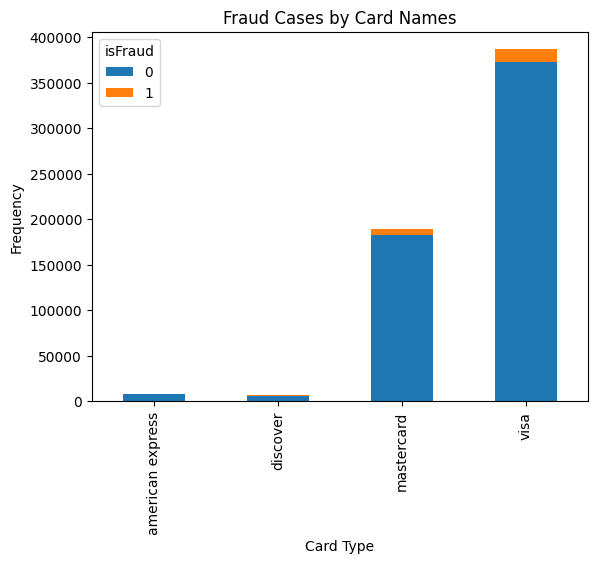

In [37]:
card_fraud = df[['card4', 'isFraud']]
card_fraud_grouped = card_fraud.groupby(['card4', 'isFraud']).size().unstack()
card_fraud_grouped.plot(kind='bar', stacked=True)
plt.title('Fraud Cases by Card Names')
plt.xlabel('Card Type')
plt.ylabel('Frequency')
plt.show()

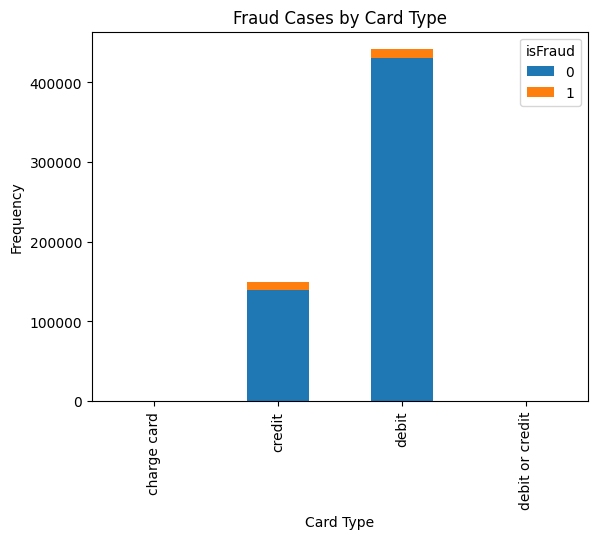

In [38]:
card_fraud = df[['card6', 'isFraud']]
card_fraud_grouped = card_fraud.groupby(['card6', 'isFraud']).size().unstack()
card_fraud_grouped.plot(kind='bar', stacked=True)
plt.title('Fraud Cases by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Frequency')
plt.show()

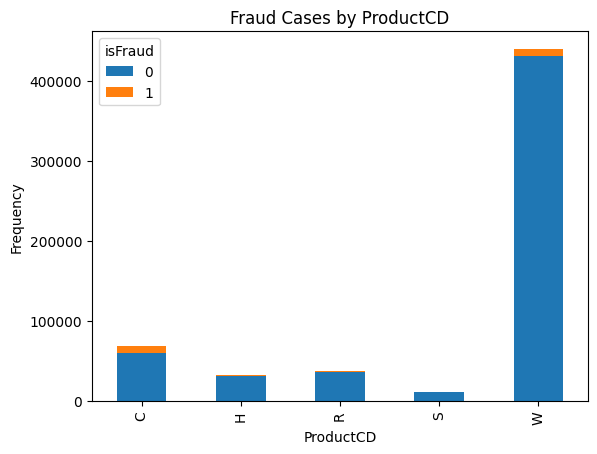

In [39]:
card_fraud = df[['ProductCD', 'isFraud']]
card_fraud_grouped = card_fraud.groupby(['ProductCD', 'isFraud']).size().unstack()
card_fraud_grouped.plot(kind='bar', stacked=True)
plt.title('Fraud Cases by ProductCD')
plt.xlabel('ProductCD')
plt.ylabel('Frequency')
plt.show()

<Figure size 1400x1400 with 0 Axes>

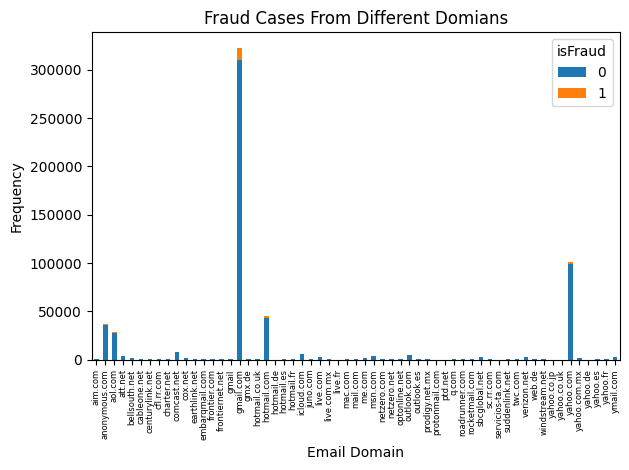

In [40]:
card_fraud = df[['P_emaildomain', 'isFraud']]
card_fraud_grouped = card_fraud.groupby(['P_emaildomain', 'isFraud']).size().unstack()
plt.figure(figsize=(14, 14))
card_fraud_grouped.plot(kind='bar', stacked=True)
plt.title('Fraud Cases From Different Domians')
plt.xlabel('Email Domain')
plt.xticks(fontsize=6)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

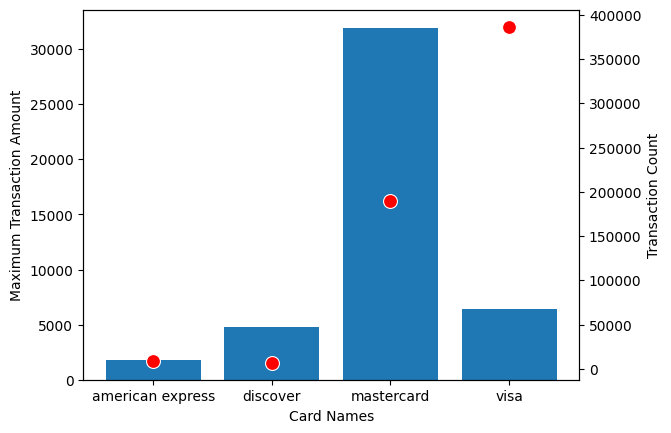

In [41]:
grouped = df.groupby('card4')
max_transaction_amount = grouped['TransactionAmt'].max()
transaction_count = grouped.size()
fig, ax1 = plt.subplots()
ax1.bar(max_transaction_amount.index, max_transaction_amount.values)
ax1.set_xlabel('Card Names')
ax1.set_ylabel('Maximum Transaction Amount')
ax2 = ax1.twinx()
sb.scatterplot(x=transaction_count.index, y=transaction_count.values, s=100, ax=ax2, color= 'red')
ax2.set_ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

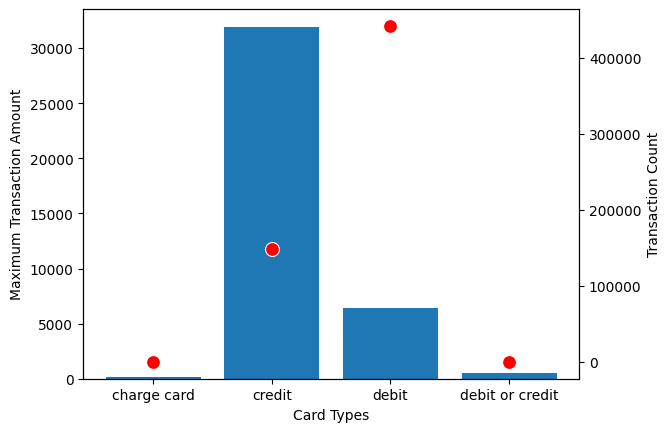

In [42]:
grouped = df.groupby('card6')
max_transaction_amount = grouped['TransactionAmt'].max()
transaction_count = grouped.size()
fig, ax1 = plt.subplots()
ax1.bar(max_transaction_amount.index, max_transaction_amount.values)
ax1.set_xlabel('Card Types')
ax1.set_ylabel('Maximum Transaction Amount')
ax2 = ax1.twinx()
sb.scatterplot(x=transaction_count.index, y=transaction_count.values, s=100, ax=ax2, color= 'red')
ax2.set_ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

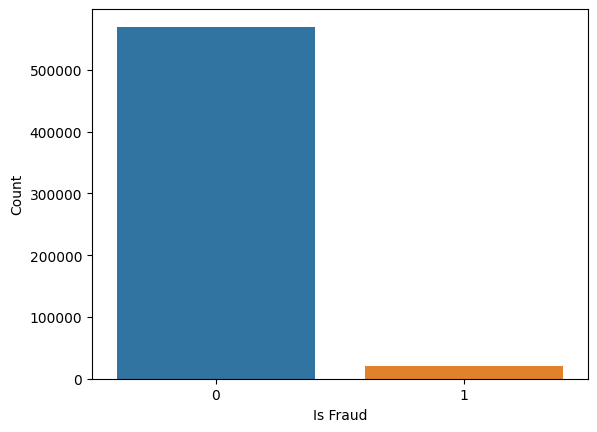

In [43]:
fraud_counts = df['isFraud'].value_counts()
fig, ax = plt.subplots()
sb.barplot(x=fraud_counts.index, y=fraud_counts.values, ax=ax)
ax.set_xlabel('Is Fraud')
ax.set_ylabel('Count')
plt.show()

# Feaure Engineering

In [44]:
from sklearn.preprocessing import LabelEncoder
obj_cols = df.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in obj_cols:
    df[col] = le.fit_transform(df[col])

In [45]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V321,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M6
0,2987000,0,86400,68.5,13926,361.0,150.0,142.0,315.0,87.0,...,0.0,4,1,1,16,1,1,1,2,1
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,0.0,4,2,1,16,1,1,1,0,1
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,0.0,4,3,2,35,1,1,1,0,0
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,0.0,4,2,2,53,1,1,1,0,0
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,0.0,1,2,1,16,1,1,1,0,0


In [47]:
from imblearn.over_sampling import SMOTE

# Separate the features and target variable
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Perform SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the shape of the resampled data
print("Original shape:", X.shape, y.shape)
print("Resampled shape:", X_resampled.shape, y_resampled.shape)

Original shape: (590540, 205) (590540,)
Resampled shape: (1139754, 205) (1139754,)


In [48]:
y.value_counts(),y_resampled.value_counts()

(0    569877
 1     20663
 Name: isFraud, dtype: int64,
 0    569877
 1    569877
 Name: isFraud, dtype: int64)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20,random_state = 42)

In [50]:
print(f'shape of x_train : {X_train.shape}')
print(f'shape of x_test : {X_test.shape}')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of y_test : {y_test.shape}')

shape of x_train : (911803, 205)
shape of x_test : (227951, 205)
shape of y_train : (911803,)
shape of y_test : (227951,)


In [51]:
from sklearn.preprocessing import StandardScaler #Standardization
func = StandardScaler()
func.fit(X_train)
X_train = func.transform(X_train)
X_test = func.transform(X_test)

# Model building and training

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [53]:
base_estimator = DecisionTreeClassifier(max_depth=3,criterion = 'entropy')
adaboost = AdaBoostClassifier(estimator=base_estimator,random_state = 42)

scores = cross_val_score(adaboost, X_train, y_train, cv=3, scoring='roc_auc')

print("Mean AUC-ROC score:", scores.mean())

adaboost.fit(X_train, y_train)

Mean AUC-ROC score: 0.9953454016566177


AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3),
                   random_state=42)

In [54]:
from sklearn.metrics import accuracy_score, f1_score

train_preds = adaboost.predict(X_train)
test_preds = adaboost.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
train_f1 = f1_score(y_train, train_preds)

test_accuracy = accuracy_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)

In [55]:
train_preds

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [58]:
test_preds

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [56]:
print(f"Train Accuracy: {train_accuracy}")
print(f"Train F1 score: {train_f1}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 score: {test_f1}")

Train Accuracy: 0.9831158704237648
Train F1 score: 0.9829327320156228
Test Accuracy: 0.9827550657816811
Test F1 score: 0.9825728054192324


In [57]:
from sklearn.metrics import roc_auc_score
train_auc_score = roc_auc_score(y_train, adaboost.predict_proba(X_train)[:, 1])
test_auc_score = roc_auc_score(y_test, adaboost.predict_proba(X_test)[:, 1])

print("Train AUC-ROC Score: ", train_auc_score)
print("Test AUC-ROC Score: ", test_auc_score)

Train AUC-ROC Score:  0.9957657869174139
Test AUC-ROC Score:  0.995572244505222
